In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

data = pd.read_csv('../input/jobs-on-naukricom/home/sdf/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')

<img src='https://www.businessinsider.in/photo/72532929/These-jobs-may-disappear-in-the-coming-years-with-the-advancement-in-technology.jpg' height='300px' width='600px'>

Technology has been reshaping work since the first Industrial Revolution, which can be traced
back to the 1700’s when manufacturing was pegged with the emergence of ‘industries’ as
Mechanical Technology powered the first factories. This revolution demolished guilds and
replaced artisanal craftsmanship with assembly line production. In the 1800’s, with the discovery
of electricity, the electrical impetus made possible the division of labour and mass production.
The third industrial revolution of the 1900’s brought with it automated, IT enabled solutions
which streamlined the programmatic work and limited the reliance on manual labour. Today, the
fourth industrial revolution has augmented connectivity between cyber-physical systems,
powered by exponential technologies and skilled data experts to create a fully interconnected
society. <a href="http://ficci.in/spdocument/23031/Future-of-Jobs-in-India-2.0.pdf">Source</a>

# Description of Data

In [2]:
# describing data

data.describe(include='all')

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
count,30000,30000,29425,29950,29427,28729,27695,29423,29427,29427,29099
unique,30000,28865,23884,1258,256,26909,206,2573,72,122,649
top,d3c786f17eee6ac95911cdd1e91e1fc6,2019-08-04 02:01:21 +0000,Sales Executive,Not Disclosed by Recruiter,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
freq,1,5,120,19731,2002,102,8551,4986,7400,10012,6396


In [3]:
#shape of data

data.shape

(30000, 11)

# Dropping some variables unnecessary for analysis

In [4]:
drop_var = ['Uniq Id', 'Crawl Timestamp']

data.drop(drop_var, axis=1, inplace=True)

# Report of Data

In [5]:
report = ProfileReport(data)

In [6]:
report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



In [7]:
pd.options.plotting.backend = "plotly"

# Checking for missing and duplicate values

Missing Values Plot


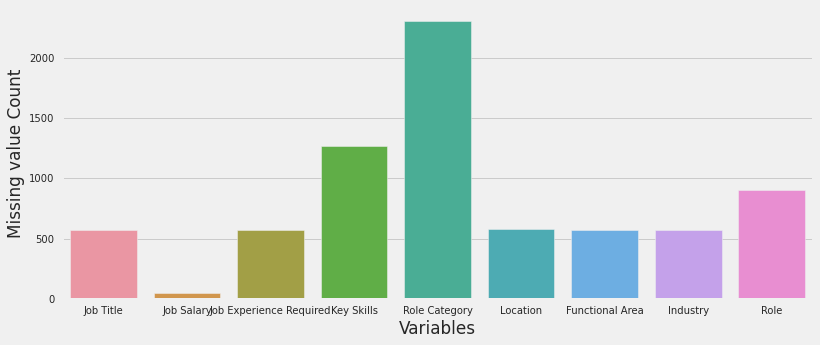

In [8]:
print('Missing Values Plot')
plt.figure(figsize=(12,5))
sns.barplot(data=data.isnull().sum().reset_index(), x='index', y=0)
plt.xlabel('Variables')
plt.ylabel('Missing value Count')
plt.show()

The missing values are such that they can't be imputed without a brief knowledge and checking relation with other variables. 

So for now I will continue working with those. Moreover I am not using the data for building any model so a null value should not affect the analysis too much hopefully.

In [9]:
# dropping duplicates

data = data.drop_duplicates()

# Answering some questions with data

How many unique values are present per vairable?


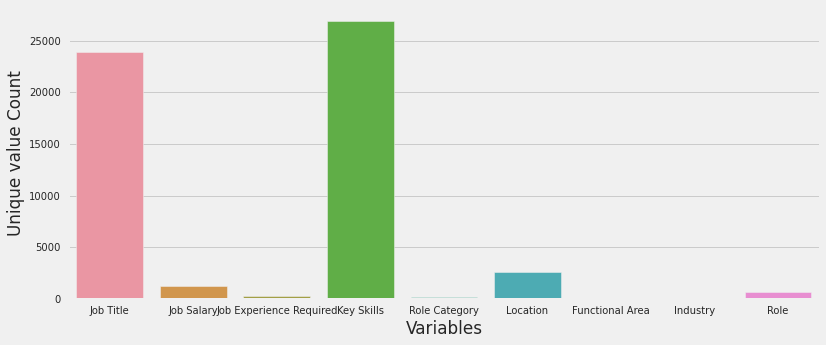

In [10]:
print('How many unique values are present per vairable?')
plt.figure(figsize=(12,5))
sns.barplot(data=data.nunique().reset_index(), x='index', y=0)
plt.xlabel('Variables')
plt.ylabel('Unique value Count')
plt.show()

What are the most common job titles?


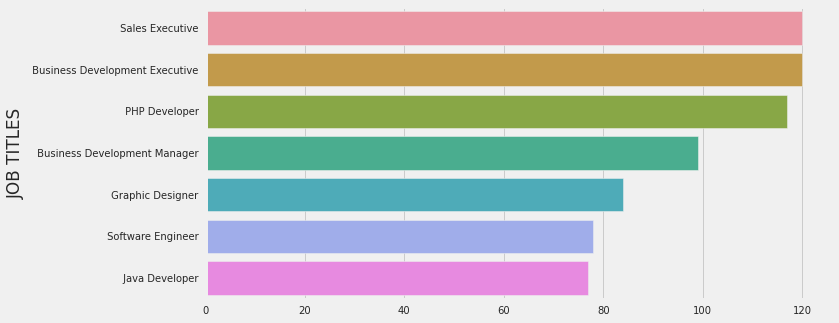

In [11]:
print("What are the most common job titles?")
df = data['Job Title'].value_counts().reset_index().head(7)
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='index', x='Job Title')
plt.xlabel('')
plt.ylabel('JOB TITLES')
plt.show()

What are the most common Job Salaries?


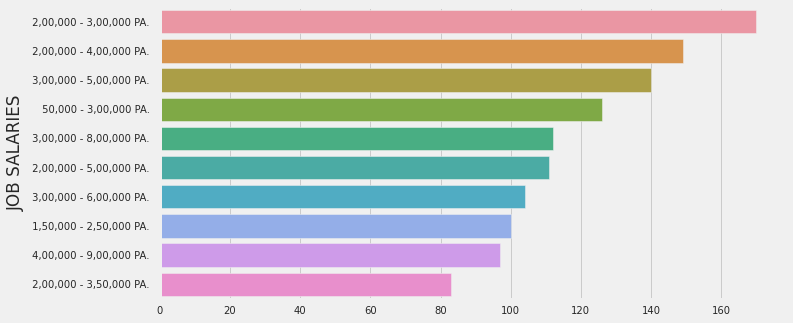

In [12]:
df = data['Job Salary'].dropna().reset_index()
df = df[df['Job Salary'].str.contains('PA')]

print("What are the most common Job Salaries?")
df = df['Job Salary'].value_counts().reset_index().head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='index', x='Job Salary')
plt.xlabel('')
plt.ylabel('JOB SALARIES')
plt.show()

In [13]:
print('Most common job titles of people working with data')
df = data[data['Job Title'].str.contains('Data')==True]
df = df.dropna().reset_index()
df1 = df['Job Title'].value_counts().reset_index().head()
df1 = df1.sort_values('Job Title', ascending=True)
df1.plot(kind='bar', x='index', y='Job Title', color='Job Title').update_layout(xaxis_title='', yaxis_title='Job Title')

Most common job titles of people working with data


Common salary of people working with data


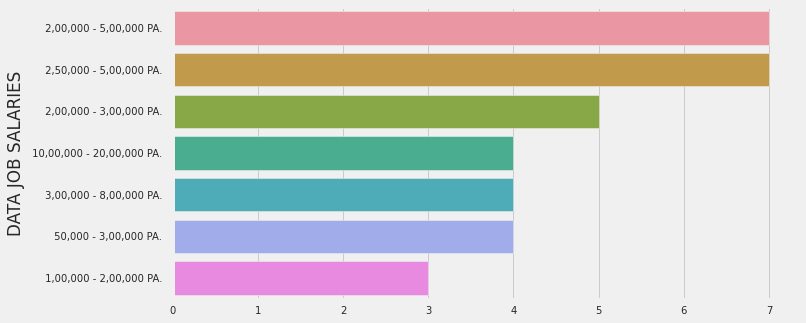

In [14]:
print('Common salary of people working with data')
df = data[data['Job Title'].str.contains('Data')==True]
df = df.dropna().reset_index()
df = df[df['Job Salary'].str.contains('PA')]
df = df['Job Salary'].value_counts().reset_index().head(7)
plt.figure(figsize=(10,5))
sns.barplot(data=df, y='index', x='Job Salary')
plt.xlabel('')
plt.ylabel('DATA JOB SALARIES')
plt.show()

In [15]:
print('What is the most common job experience required?')
df = data['Job Experience Required'].value_counts().reset_index().head(6)
df = df.sort_values('Job Experience Required', ascending=True)
df.plot(kind='bar', x='index', y='Job Experience Required', color='Job Experience Required').update_layout(xaxis_title='Job Experience Required', yaxis_title='')

What is the most common job experience required?


In [16]:
print('Salary range of Data Scientists: 8-30 LPA')
df = data[data['Job Title']==' Data Scientist']
df1 = df['Job Salary'].value_counts().reset_index()[1:]
df1

Salary range of Data Scientists: 8-30 LPA


,index,Job Salary
1,"13,00,000 - 19,00,000 PA.",1
2,"8,00,000 - 15,00,000 PA.",1
3,"15,00,000 - 30,00,000 PA.",1


In [17]:
print('Salary range of Data Analysts: 5-9 LPA')
df = data[data['Job Title']==' Data Analyst']
df1 = df['Job Salary'].value_counts().reset_index()[1:]
df1

Salary range of Data Analysts: 5-9 LPA


,index,Job Salary
1,"5,00,000 - 9,00,000 PA.",1
2,"3,25,000 - 5,50,000 PA.",1


In [18]:
print('Experience required for Data Scientists: 2-9 years')
df = data[data['Job Title']==' Data Scientist']
df1 = df['Job Experience Required'].value_counts().reset_index()[1:]
df1.plot(kind='bar', x='index', y='Job Experience Required', color='Job Experience Required')

Experience required for Data Scientists: 2-9 years


In [19]:
print('Experience required for Data Analysts: 5-12 years')
df = data[data['Job Title']==' Data Analyst']
df1 = df['Job Experience Required'].value_counts().reset_index()[1:]
df1.plot(kind='bar', x='index', y='Job Experience Required')

Experience required for Data Analysts: 5-12 years


In [20]:
print('Most common location for Data Analyst or Data Scientist jobs')
df = data[data['Job Title'].isin([' Data Scientist',' Data Analyst'])]
df1 = df['Location'].value_counts().reset_index().head()
df1.plot(kind='bar', x='index', y='Location', color='Location')

Most common location for Data Analyst or Data Scientist jobs


In [21]:
print('What are the most demanded skills for data scientists?')
df = data[data['Job Title']==' Data Scientist'].reset_index(drop=True)
skills_dict = {}
for i in range(df.shape[0]):
    lst = df['Key Skills'][i].split('|')
    for j in range(len(lst)):
        if lst[j].strip() in skills_dict:
            skills_dict[lst[j].strip()]+=1
        else:
            skills_dict[lst[j].strip()]=1
df1 = pd.DataFrame(skills_dict.items())
df1 = df1.rename(columns={0:"Skill", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail(10)
df1.plot(kind='bar', y='Skill', x='NeedCount', color='NeedCount')

What are the most demanded skills for data scientists?


In [22]:
print('What are the most demanded skills for data analysts?')
df = data[data['Job Title']==' Data Analyst'].reset_index(drop=True)
skills_dict = {}
for i in range(df.shape[0]):
    lst = df['Key Skills'][i].split('|')
    for j in range(len(lst)):
        if lst[j].strip() in skills_dict:
            skills_dict[lst[j].strip()]+=1
        else:
            skills_dict[lst[j].strip()]=1
df1 = pd.DataFrame(skills_dict.items())
df1 = df1.rename(columns={0:"Skill", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail(10)
df1.plot(kind='bar', y='Skill', x='NeedCount', color='NeedCount')

What are the most demanded skills for data analysts?


In [23]:
print('What roles are data scientists expected to perform?')
df = data[data['Job Title']==' Data Scientist'].reset_index(drop=True)
roles_dict = {}
for i in range(df.shape[0]):
    lst = df['Role'][i].split('/')
    for j in range(len(lst)):
        if lst[j].strip() in roles_dict:
            roles_dict[lst[j].strip()]+=1
        else:
            roles_dict[lst[j].strip()]=1
df1 = pd.DataFrame(roles_dict.items())
df1 = df1.rename(columns={0:"Role", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail(10)
df1.plot(kind='bar', y='Role', x='NeedCount', color='NeedCount')

What roles are data scientists expected to perform?


In [24]:
print('What roles are data analysts expected to perform?')
df = data[data['Job Title']==' Data Analyst'].reset_index(drop=True)
roles_dict = {}
for i in range(df.shape[0]):
    lst = df['Role'][i].split('/')
    for j in range(len(lst)):
        if lst[j].strip() in roles_dict:
            roles_dict[lst[j].strip()]+=1
        else:
            roles_dict[lst[j].strip()]=1
df1 = pd.DataFrame(roles_dict.items())
df1 = df1.rename(columns={0:"Role", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail()
df1.plot(kind='bar', y='Role', x='NeedCount', color='NeedCount')

What roles are data analysts expected to perform?


In [25]:
print('What is the most common functional area for data scientists?')
df = data[data['Job Title']==' Data Scientist'].reset_index(drop=True)
roles_dict = {}
for i in range(df.shape[0]):
    lst = df['Functional Area'][i].split(',')
    for j in range(len(lst)):
        if lst[j].strip() in roles_dict:
            roles_dict[lst[j].strip()]+=1
        else:
            roles_dict[lst[j].strip()]=1
df1 = pd.DataFrame(roles_dict.items())
df1 = df1.rename(columns={0:"Functional Area", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail(10)
df1.plot(kind='bar', y='Functional Area', x='NeedCount', color='NeedCount')

What is the most common functional area for data scientists?


In [26]:
print('What is the most common functional area for data analysts?')
df = data[data['Job Title']==' Data Analyst'].reset_index(drop=True)
roles_dict = {}
for i in range(df.shape[0]):
    lst = df['Functional Area'][i].split(',')
    for j in range(len(lst)):
        if lst[j].strip() in roles_dict:
            roles_dict[lst[j].strip()]+=1
        else:
            roles_dict[lst[j].strip()]=1
df1 = pd.DataFrame(roles_dict.items())
df1 = df1.rename(columns={0:"Functional Area", 1:"NeedCount"})
df1 = df1.sort_values('NeedCount', ascending=True).tail(10)
df1.plot(kind='bar', y='Functional Area', x='NeedCount', color='NeedCount')

What is the most common functional area for data analysts?


### Now the whole analysis became centered to Data Scientists and Data Analysts. :)